# 4.5 The universal workflow of machine learning

In this section, we’ll present a universal blueprint that you can use to attack and solve
any machine-learning problem. The blueprint ties together the concepts you’ve
learned about in this chapter: problem definition, evaluation, feature engineering,
and fighting overfitting.

## 4.5.1 Defining the problem and assembling a dataset

First, you must define the problem at hand:
* __What will your input data be? What are you trying to predict?__ You can only learn to predict something if you have available training data: for example, you can only learn to classify the sentiment of movie reviews if you have both movie reviews and sentiment annotations available. As such, data availability is usually the limiting factor at this stage (unless you have the means to pay people to collect data for you).
* __What type of problem are you facing?__ Is it binary classification? Multiclass classification? Scalar regression? Vector regression? Multiclass, multilabel classification? Something else, like clustering, generation, or reinforcement learning?Identifying the problem type will guide your choice of model architecture, loss function, and so on.

You can’t move to the next stage until you know what your inputs and outputs are, and
what data you’ll use. Be aware of the hypotheses you make at this stage:
* You hypothesize that your outputs can be predicted given your inputs.
* You hypothesize that your available data is sufficiently informative to learn the relationship between inputs and outputs.

Until you have a working model, these are merely hypotheses, waiting to be validated
or invalidated. Not all problems can be solved; just __because you’ve assembled examples
of inputs X and targets Y__ __doesn’t mean X contains enough information to predict
Y.__ For instance, if you’re trying to predict the movements of a stock on the stock market
given its recent price history, you’re unlikely to succeed, because price history
doesn’t contain much predictive information.

One class of unsolvable problems you should be aware of is nonstationary problems.
Suppose you’re trying to build a recommendation engine for clothing, you’re training
it on one month of data (August), and you want to start generating recommendations
in the winter. One big issue is that the kinds of clothes people buy change from season
to season: clothes buying is a nonstationary phenomenon over the scale of a few
months. What you’re trying to model changes over time. In this case, the right move is
to constantly retrain your model on data from the recent past, or gather data at a
timescale where the problem is stationary. For a cyclical problem like clothes buying, a
few years’ worth of data will suffice to capture seasonal variation—but remember to
make the time of the year an input of your model!

Keep in mind that machine learning can only be used to memorize patterns that
are present in your training data. You can only recognize what you’ve seen before.
Using machine learning trained on past data to predict the future is making the
assumption that the future will behave like the past. That often isn’t the case.

## 4.5.2 Choosing a measure of success

To control something, you need to be able to observe it. To achieve success, you must
define what you mean by success—accuracy? Precision and recall? Customer-retention
rate? Your metric for success will guide the choice of a loss function: what your model
will optimize. It should directly align with your higher-level goals, such as the success
of your business.

For balanced-classification problems, where every class is equally likely, accuracy and
area under the receiver operating characteristic curve (ROC AUC) are common metrics. For
class-imbalanced problems, you can use precision and recall. For ranking problems or
multilabel classification, you can use mean average precision. And it isn’t uncommon
to have to define your own custom metric by which to measure success. To get a sense
of the diversity of machine-learning success metrics and how they relate to different
problem domains, it’s helpful to browse the data science competitions on Kaggle
(https://kaggle.com); they showcase a wide range of problems and evaluation metrics.

## 4.5.3 Deciding on an evaluation protocol

Once you know what you’re aiming for, you must establish how you’ll measure your
current progress. We’ve previously reviewed three common evaluation protocols:
* __Maintaining a hold-out validation set__—The way to go when you have plenty of data
* __Doing K-fold cross-validation__—The right choice when you have too few samples for hold-out validation to be reliable
* __Doing iterated K-fold validation__—For performing highly accurate model evaluation when little data is available

Just pick one of these. In most cases, the first will work well enough.

## 4.5.4 Preparing your data

Once you know what you’re training on, what you’re optimizing for, and how to evaluate
your approach, you’re almost ready to begin training models. But first, you should
format your data in a way that can be fed into a machine-learning model—here, we’ll
assume a deep neural network:
* As you saw previously, your data should be formatted as tensors.
* The values taken by these tensors should usually be scaled to small values: for example, in the [-1, 1] range or [0, 1] range.
* If different features take values in different ranges (heterogeneous data), then the data should be normalized.
* You may want to do some feature engineering, especially for small-data problems.

Once your tensors of input data and target data are ready, you can begin to train models.

## 4.5.5 Developing a model that does better than a baseline

Your goal at this stage is to achieve __statistical power__: that is, to develop a small model
that is capable of beating a dumb baseline. In the MNIST digit-classification example,
anything that achieves an accuracy greater than 0.1 can be said to have statistical
power; in the IMDB example, it’s anything with an accuracy greater than 0.5.

Note that it’s not always possible to achieve statistical power. __If you can’t beat a random
baseline after trying multiple reasonable architectures, it may be that the answer
to the question you’re asking isn’t present in the input data__. Remember that you make
two hypotheses:
* You hypothesize that your outputs can be predicted given your inputs.
* You hypothesize that the available data is sufficiently informative to learn the relationship between inputs and outputs.

It may well be that these hypotheses are false, in which case you must go back to the
drawing board.

Assuming that things go well, you need to make three key choices to build your
first working model:
* __Last-layer activation__—__This establishes useful constraints on the network’s output___. For instance, the __IMDB classification__ example __used sigmoid__ in the last layer; the __regression__ example __didn’t use any last-layer activation__; and so on.
* __Loss function__—__This should match the type of problem you’re trying to solve__. For instance, the __IMDB__ example __used binary_crossentropy__, the __regression__ example __used mse__, and so on.
* __Optimization configuration__—__What optimizer will you use? What will its learning rate be?__ In most cases, it’s safe to go with rmsprop and its default learning rate.

Regarding the choice of a loss function, note that it isn’t always possible to directly
optimize for the metric that measures success on a problem. Sometimes there is no
easy way to turn a metric into a loss function; loss functions, after all, need to be computable
given only a mini-batch of data (ideally, a loss function should be computable
for as little as a single data point) and must be differentiable (otherwise, you can’t use
backpropagation to train your network). For instance, the widely used classification
metric ROC AUC can’t be directly optimized. Hence, in classification tasks, it’s common
to optimize for a proxy metric of ROC AUC, such as crossentropy. In general, you
can hope that the lower the crossentropy gets, the higher the ROC AUC will be.

Table below can help you choose a last-layer activation and a loss function for a few
common problem types.

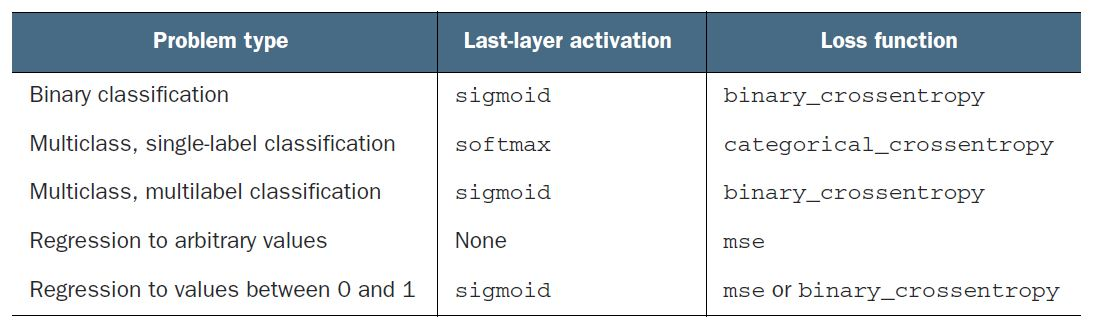

## 4.5.6 Scaling up: developing a model that overfits

Once you’ve obtained a model that has statistical power, the question becomes, is your
model sufficiently powerful? Does it have enough layers and parameters to properly
model the problem at hand? For instance, a network with a single hidden layer with
two units would have statistical power on MNIST but wouldn’t be sufficient to solve the
problem well. Remember that the universal tension in machine learning is between
optimization and generalization; the ideal model is one that stands right at the border
between underfitting and overfitting; between undercapacity and overcapacity. To figure
out where this border lies, first you must cross it.

To figure out how big a model you’ll need, you must develop a model that overfits.
This is fairly easy:
1. Add layers.
2. Make the layers bigger.
3. Train for more epochs.

Always monitor the training loss and validation loss, as well as the training and validation
values for any metrics you care about. When you see that the model’s performance
on the validation data begins to degrade, you’ve achieved overfitting.

The next stage is to start regularizing and tuning the model, to get as close as possible
to the ideal model that neither underfits nor overfits.

## 4.5.7 Regularizing your model and tuning your hyperparameters

This step will take the most time: you’ll repeatedly modify your model, train it, evaluate
on your validation data (not the test data, at this point), modify it again, and
repeat, until the model is as good as it can get. These are some things you should try:
* Add dropout.
* Try different architectures: add or remove layers.
* Add L1 and/or L2 regularization.
* Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.
* Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative.

Be mindful of the following: every time you use feedback from your validation process
to tune your model, you leak information about the validation process into the model.
Repeated just a few times, this is innocuous; but done systematically over many iterations,
it will eventually cause your model to overfit to the validation process (even
though no model is directly trained on any of the validation data). This makes the
evaluation process less reliable.

Once you’ve developed a satisfactory model configuration, you can train your final
production model on all the available data (training and validation) and evaluate it
one last time on the test set. If it turns out that performance on the test set is significantly
worse than the performance measured on the validation data, this may mean
either that your validation procedure wasn’t reliable after all, or that you began overfitting
to the validation data while tuning the parameters of the model. In this case,
you may want to switch to a more reliable evaluation protocol (such as iterated K-fold
validation).

# Chapter summary

* __Define the problem at hand__ and __the data on which you’ll train__. Collect this data, or annotate it with labels if need be.
* __Choose how you’ll measure success on your problem__. Which metrics will you monitor on your validation data?
* __Determine your evaluation protocol__: hold-out validation? K-fold validation? Which portion of the data should you use for validation?
* __Develop a first model that does better than a basic baseline__: a model with statistical power.
* __Develop a model that overfits__.
* __Regularize your model and tune its hyperparameters, based on performance on the validation data__. A lot of machine-learning research tends to focus only on this step—but keep the big picture in mind.